# Problema 1

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def numconvorder(h, err):
    alpha = np.log(err[:-1,:]/err[1:,:])/np.log(2)
    C = err[:-1,:] / (h[:-1,:] ** alpha)
    return alpha, C

### b)

In [2]:
def numdiff_1(f, x, k):
    h = np.array([[1/2**i] for i in range(k)])
    Phi1 = np.array([[ (f(x+2**(-i))-f(x))/2**(-i)] for i in range(k)])
    return h, Phi1

def numdiff_2(f, x, k):
    h = np.array([[1/2**i] for i in range(k)])
    Phi2 = np.array([[ (f(x+2**(-i))-f(x-2**(-i)))/2**(1-i)] for i in range(k)])
    return h, Phi2

### c)

In [3]:
x = 1
k = 16
f = lambda x: np.exp(x)
h_1, Phi1 = numdiff_1(f, x, k)
h_2, Phi2 = numdiff_2(f, x, k)
err_1 = np.abs(Phi1-np.exp(1))
err_2 = np.abs(Phi2-np.exp(1))

alpha_1, C_1 = numconvorder(h_1, err_1)
alpha_2, C_2 = numconvorder(h_2, err_2)

alpha_1r = round(alpha_1[-1][0], 0)
alpha_2r = round(alpha_2[-1][0], 0)

print(f"Orden de convergencia para Phi1: {alpha_1r}\nOrden de convergencia para Phi2: {alpha_2r}")

Orden de convergencia para Phi1: 1.0
Orden de convergencia para Phi2: 2.0


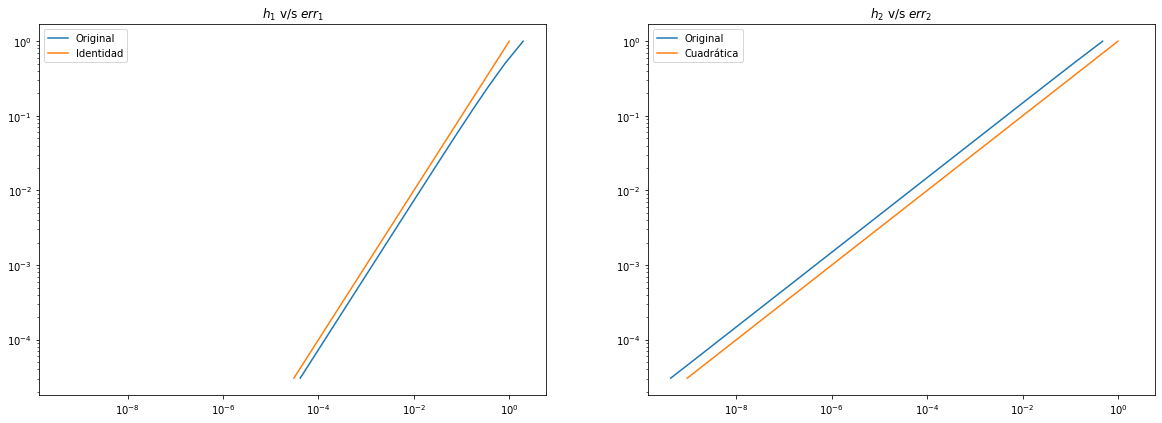

In [44]:
X_1 = np.linspace(min(h_1**alpha_1r), max(h_1**alpha_1r), 15)
X_2 = np.linspace(min(h_1**alpha_2r), max(h_1**alpha_2r), 15)

f_1 = lambda x: x
f_2 = lambda x: x**0.5

fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax1.loglog(err_1, h_1)
ax1.loglog(X_1, f_1(X_1), label = "Identidad")
ax2.loglog(err_2, h_2)
ax2.loglog(X_2, f_2(X_2), label = "Cuadrática")
ax1.set_title("$h_1$ v/s $err_1$")
ax2.set_title("$h_2$ v/s $err_2$")
ax1.legend(["Original", "Identidad"])
ax2.legend(["Original", "Cuadrática"])
plt.show()

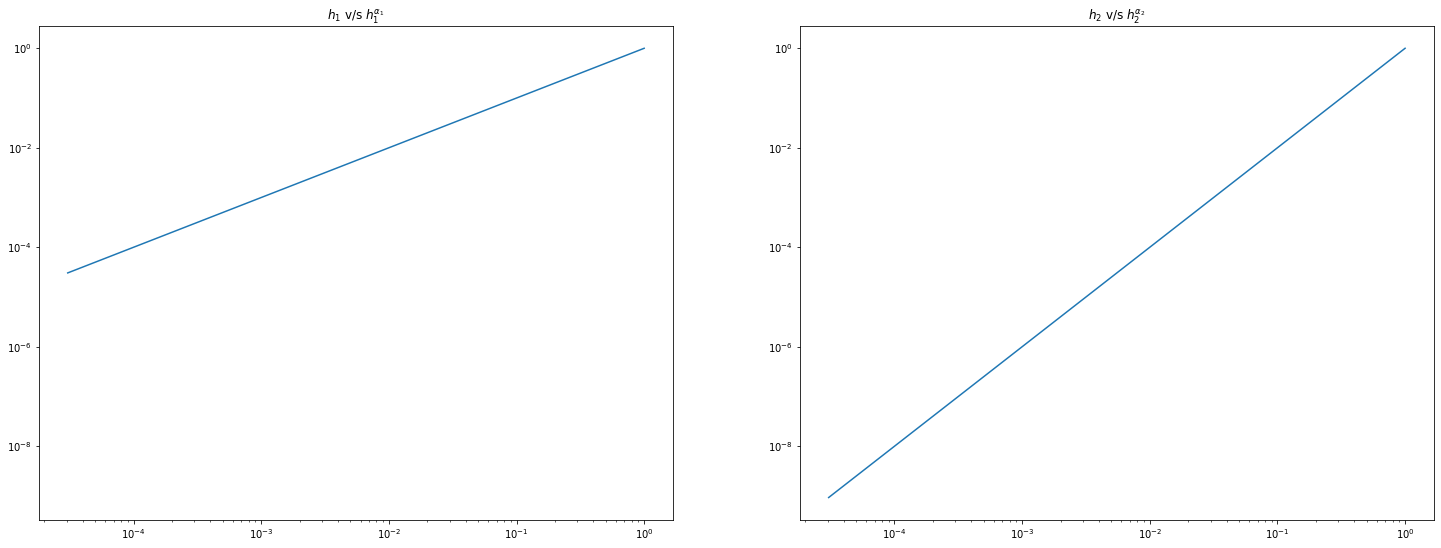

In [24]:
fig = plt.figure(figsize = (25,20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax1.loglog(h_1, h_1**alpha_1r)

ax2.loglog(h_2, h_2**alpha_2r)

ax1.set_title("$h_1$ v/s $h_1^{α_1}$")
ax2.set_title("$h_2$ v/s $h_2^{α_2}$")
plt.show()

Conclusiones: Claramente podemos notar que el segundo método, cuyo orden de convergencia es 2, a medida que el h disminuye, el error disminuye mucho más que para el primer método. Apesar de que intuitivamente la primera gráfica posee una pendiente más pronunciada, se demora mucho más en alcanzar el 0 del eje x (error). Por lo tanto, efectivamente un orden de convergencia 2, es mucho más óptimo que uno de convergencia 1.

# Problema 8

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from numpy import linalg as la

rango = [-3.5, 3.5]

def plot(array, vectors,shape = (10,10), name = [], pos = [], axis = [], color_ = []):
    if pos == []:
        pos = [(0,0) for i in range(len(vectors))]
        
    if axis == []:
        axis = [False for i in range(len(vectors))]
        
    if name == []:
        name = False
    if color_ == []:
        color_ = ["black" for i in range(len(vectors))]
    fig, ax = plt.subplots(figsize = shape)
    for v in array:
        ax.plot(v[0], v[1])
    
    start = [0,0]
    count = 1
    color = ["black", "blue", "red", "skyblue"]
    if name == False:
        for v in vectors:
            r = (v[0]**2+v[1]**2)**0.5
            if axis[count-1]:
                ax.plot([-4*v[0]/r, 4*v[0]/r], [-4*v[1]/r, 4*v[1]/r])
            ax.quiver(*start, v[0], v[1], scale=1, scale_units = 'xy', angles = 'xy')
            ax.annotate(f"$u_{count}$", (v[0], v[1]), color = color_[(count-1)], fontsize = 20, alpha = 0.8)
            count += 1
    else:
        for v in vectors:
            r = (v[0]**2+v[1]**2)**0.5
            if axis[count-1]:
                ax.plot([-4*v[0]/r, 4*v[0]/r], [-4*v[1]/r, 4*v[1]/r])
            ax.quiver(*start, v[0], v[1], scale=1, scale_units = 'xy', angles = 'xy', color = color_[count-1])
            ax.annotate(name[count-1], (v[0] + pos[count-1][0], v[1] + pos[count-1][1]), color = color_[count-1], fontsize = 20, alpha = 0.8)
            count += 1
    
    plt.xlim(rango)
    plt.ylim(rango)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def unit_ball(resolution = 50):
    theta = np.linspace(-np.pi, np.pi, resolution)
    X = np.cos(theta)
    Y = np.sin(theta)
    return (X, Y)

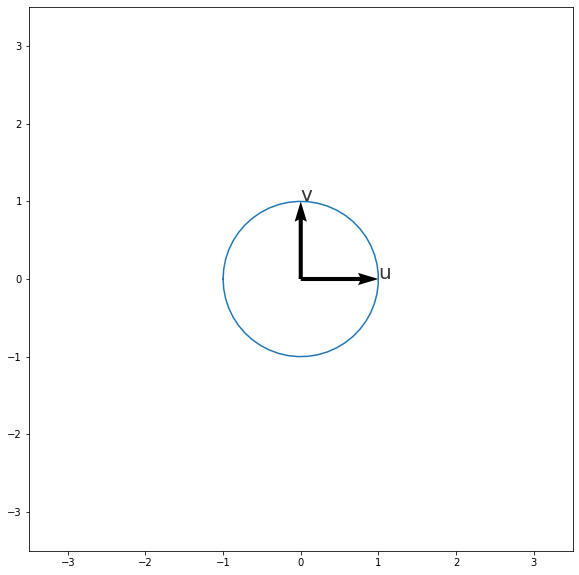

In [2]:
plot([unit_ball()], [(1,0), (0,1)], name = ["u", "v"])

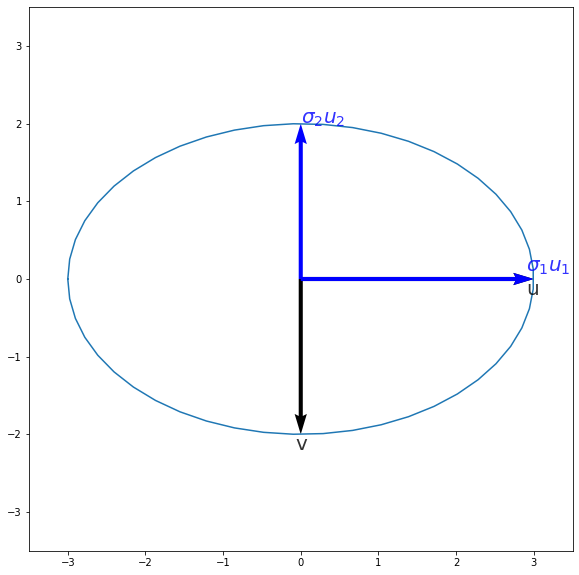

In [3]:
A = np.array([[3, 0],[0, -2]])

U, S, V = linalg.svd(A)

v_1 = np.array([[1], [0]])
v_2 = np.array([[0], [1]])
elipse = np.array([ A@np.array([unit_ball()[0][i], unit_ball()[1][i]]) for i in range(50)])
plot([(elipse[:, 0], elipse[:, 1])],
     [A@v_1, A@v_2, U[:, [0]] * S[0], U[:, [1]]* S[1]] ,
     name= ["u", "v", "$\sigma_1 u_1$", "$\sigma_2 u_2$"],
     axis = [False, False, False, False],
     pos = [(-0.1, -0.2), (-0.07 , -0.2),(-0.1 ,0.1), (0, 0)], color_ = ["black", "black", "blue", "blue"])

In [4]:
print(f"{U} = U\n")
print(f"{S} = S\n")
print(f"{V} = V^t")

[[1. 0.]
 [0. 1.]] = U

[3. 2.] = S

[[ 1.  0.]
 [-0. -1.]] = V^t


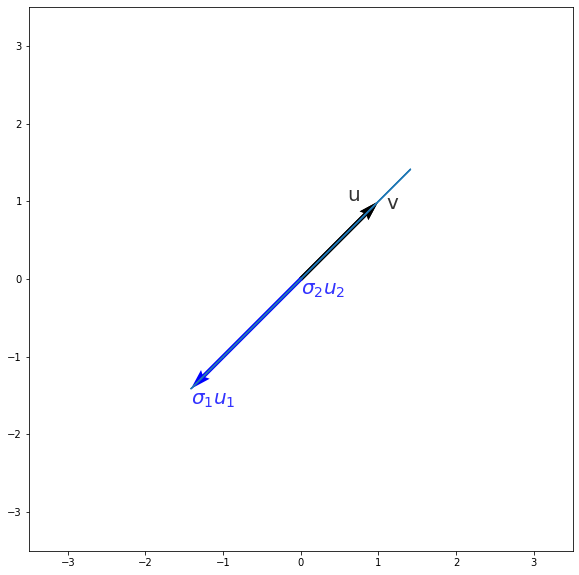

In [5]:
A = np.array([[1, 1],[1, 1]])

U, S, V = linalg.svd(A)

v_1 = np.array([[1], [0]])
v_2 = np.array([[0], [1]])
elipse = np.array([ A@np.array([unit_ball()[0][i], unit_ball()[1][i]]) for i in range(50)])
plot([(elipse[:, 0], elipse[:, 1])], [A@v_1, A@v_2, U[:, [0]] * S[0], U[:, [1]]* S[1]],
     pos = [(-0.4, 0.), (0.1, -0.1), (0, -0.2), (0, -0.2)],
     name= ["u", "v", "$\sigma_1 u_1$", "$\sigma_2 u_2$"],
     color_ = ["black", "black", "blue", "blue"],
     axis = [False, False, False, False])

In [6]:
print(f"{U} = U\n")
print(f"{S} = S\n")
print(f"{V} = V^t")

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] = U

[2.00000000e+00 3.35470445e-17] = S

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]] = V^t


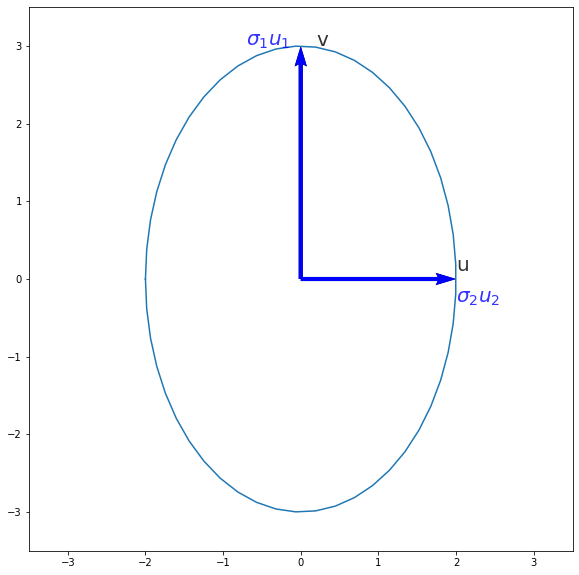

In [7]:
A = np.array([[2, 0],[0, 3]])

U, S, V = linalg.svd(A)

v_1 = np.array([[1], [0]])
v_2 = np.array([[0], [1]])
elipse = np.array([ A@np.array([unit_ball()[0][i], unit_ball()[1][i]]) for i in range(50)])
plot([(elipse[:, 0], elipse[:, 1])], [A@v_1, A@v_2, U[:, [0]] * S[0], U[:, [1]]* S[1]],
     pos = [(0, 0.1), (0.2, 0), (-0.7, 0), (0, -0.3)],
     name= ["u", "v", "$\sigma_1 u_1$", "$\sigma_2 u_2$"],
     color_ = ["black", "black", "blue", "blue"],
     axis = [False, False, False, False])

In [8]:
print(f"{U} = U\n")
print(f"{S} = S\n")
print(f"{V} = V^t")

[[0. 1.]
 [1. 0.]] = U

[3. 2.] = S

[[0. 1.]
 [1. 0.]] = V^t
